# Part 2.b

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Concatenate the data into 1 dataframe for the remainder of the analysis.

In [2]:
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')
year_2002 = pd.read_csv('Data/final_tmdb_data_2002.csv.gz')
year_2003 = pd.read_csv('Data/final_tmdb_data_2003.csv.gz')
year_2004 = pd.read_csv('Data/final_tmdb_data_2004.csv.gz')
year_2005 = pd.read_csv('Data/final_tmdb_data_2005.csv.gz')
year_2006 = pd.read_csv('Data/final_tmdb_data_2006.csv.gz')
year_2007 = pd.read_csv('Data/final_tmdb_data_2007.csv.gz')
year_2008 = pd.read_csv('Data/final_tmdb_data_2008.csv.gz')
year_2009 = pd.read_csv('Data/final_tmdb_data_2009.csv.gz')
year_2010 = pd.read_csv('Data/final_tmdb_data_2010.csv.gz')

In [3]:
df = pd.concat([year_2001, year_2002, year_2003, year_2004, year_2005,
               year_2006, year_2007, year_2008, year_2009, year_2010])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.323,1242.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.156,32.0,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18670 entries, 0 to 2755
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                18670 non-null  object 
 1   adult                  18660 non-null  float64
 2   backdrop_path          10505 non-null  object 
 3   belongs_to_collection  1405 non-null   object 
 4   budget                 18660 non-null  float64
 5   genres                 18660 non-null  object 
 6   homepage               3548 non-null   object 
 7   id                     18660 non-null  float64
 8   original_language      18660 non-null  object 
 9   original_title         18660 non-null  object 
 10  overview               18215 non-null  object 
 11  popularity             18660 non-null  float64
 12  poster_path            16496 non-null  object 
 13  production_companies   18660 non-null  object 
 14  production_countries   18660 non-null  object 
 15  rel

In [5]:
df.duplicated().sum()

9

In [6]:
df.drop_duplicates(inplace=True)

### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [7]:
# budget = df['budget'] > 0
# revenue = df['revenue'] > 0
# financial_filter = df.loc[budget | revenue]

In [8]:
filter_financial = (df['budget'] > 0) | (df['revenue']>0)
filter_financial.value_counts()

False    13328
True      5333
dtype: int64

In [9]:
plot_df = df[filter_financial].copy()

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [10]:
## to order them (optional)
cert_order = ['G','PG','PG-13','R','NR']

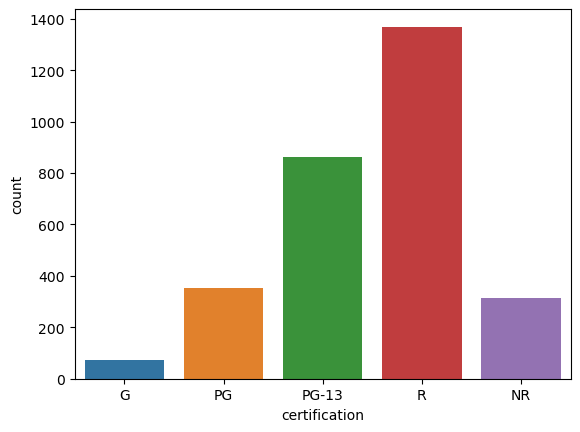

In [11]:
sns.countplot(data=plot_df, x='certification',order=cert_order);

### What is the average revenue per certification category?

In [12]:
df.groupby(['certification'])['revenue'].apply(lambda x:x.mean())

certification
G                                  5.106936e+07
NC-17                              2.976642e+06
NR                                 2.912241e+06
Not Rated                          0.000000e+00
PG                                 7.304115e+07
PG-13                              6.485726e+07
R                                  1.364824e+07
ScreamFest Horror Film Festival    0.000000e+00
UR                                 0.000000e+00
Name: revenue, dtype: float64

### What is the average budget per certification category?

In [13]:
df.groupby(['certification'])['budget'].apply(lambda x:x.mean())

certification
G                                  1.772047e+07
NC-17                              1.118875e+06
NR                                 1.414270e+06
Not Rated                          0.000000e+00
PG                                 2.601520e+07
PG-13                              2.502258e+07
R                                  7.660136e+06
ScreamFest Horror Film Festival    0.000000e+00
UR                                 0.000000e+00
Name: budget, dtype: float64

In [14]:
## Save current dataframe to file.
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

In [15]:
# Open saved file and preview again
final_combo = pd.read_csv("Data/tmdb_results_combined.csv.gz", low_memory = False)
final_combo.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0035423,0.0,/tJLV3BAlHOgscVOrA99Wnb2gAef.jpg,NaN,48000000.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 14, ...",NaN,11232.0,en,Kate & Leopold,...,76019048.0,118.0,"[{'english_name': 'French', 'iso_639_1': 'fr',...",Released,"If they lived in the same century, they'd be p...",Kate & Leopold,0.0,6.323,1242.0,PG-13
2,tt0114447,0.0,NaN,NaN,0.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",NaN,151007.0,en,The Silent Force,...,0.0,90.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,They left him for dead... They should have fin...,The Silent Force,0.0,5.000,3.0,NaN
3,tt0118589,0.0,/9NZAirJahVilTiDNCHLFcdkwkiy.jpg,NaN,22000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,10696.0,en,Glitter,...,5271666.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"In music she found her dream, her love, herself.",Glitter,0.0,4.405,132.0,PG-13
4,tt0118652,0.0,/mWxJEFRMvkG4UItYJkRDMgWQ08Y.jpg,NaN,1000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,17140.0,en,The Attic Expeditions,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,His search for peace of mind... will leave his...,The Attic Expeditions,0.0,5.156,32.0,R


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18661 entries, 0 to 2755
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                18661 non-null  object 
 1   adult                  18660 non-null  float64
 2   backdrop_path          10505 non-null  object 
 3   belongs_to_collection  1405 non-null   object 
 4   budget                 18660 non-null  float64
 5   genres                 18660 non-null  object 
 6   homepage               3548 non-null   object 
 7   id                     18660 non-null  float64
 8   original_language      18660 non-null  object 
 9   original_title         18660 non-null  object 
 10  overview               18215 non-null  object 
 11  popularity             18660 non-null  float64
 12  poster_path            16496 non-null  object 
 13  production_companies   18660 non-null  object 
 14  production_countries   18660 non-null  object 
 15  rel

## Data was collected from TMBD
https://www.themoviedb.org/about/logos-attribution